# Install Dependencies

In [1]:
!pip install --upgrade pip
!pip install numpy==1.26.4
!pip install nltk==3.9.1
!pip install scipy==1.11.4
!pip install gensim==4.3.2
!pip install contractions==0.1.73
!pip install pandas==2.2.2
!pip install scikit-learn==1.6.1
!pip install tensorflow==2.16.1
!pip install lime shap

# Import Libraries and Setup

In [2]:
import numpy as np
import pandas as pd
import nltk
import string
import re
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Load Datasets

In [95]:
#Dataset 1 : LIAR
train_data = pd.read_csv('train.tsv', sep='\t', header=None)
val_data = pd.read_csv('valid.tsv', sep='\t', header=None)
test_data = pd.read_csv('test.tsv', sep='\t', header=None)

In [96]:
print("Training set:", train_data.shape)
print("Validation set:", val_data.shape)
print("Test set:", test_data.shape)

Training set: (8956, 14)
Validation set: (1926, 14)
Test set: (1909, 14)


In [97]:
#Dataset 2 : ISOT
true_data = pd.read_csv('/content/True.csv')
fake_data = pd.read_csv('/content/Fake.csv')

In [98]:
true_data['label'] = 1
fake_data['label'] = 0
combined_data = pd.concat([true_data, fake_data], axis=0, ignore_index=True)
combined_data = combined_data.sample(frac=1).reset_index(drop=True)

# Train-Validation-Test Split

In [99]:
from sklearn.model_selection import train_test_split
train_data2, temp_data = train_test_split(
    combined_data,
    train_size=0.7,
    random_state=42,
    stratify=combined_data['label']
)

In [100]:
val_data2, test_data2 = train_test_split(
    temp_data,
    train_size=0.5,
    random_state=42,
    stratify=temp_data['label']
)

In [101]:
print("Training set:", train_data2.shape)
print("Validation set:", val_data2.shape)
print("Test set:", test_data2.shape)

Training set: (31428, 5)
Validation set: (6735, 5)
Test set: (6735, 5)


In [102]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8951,2971.json,pants-fire,"Already, the mayor of Green Bay is having ribb...","job-accomplishments,veterans",steve-kagen,U.S. House member -- 8th District,Wisconsin,democrat,0.0,0.0,0.0,0.0,2.0,a newspaper article
8952,2168.json,true,(Bill) McCollum also voted for numerous amendm...,disability,florida-democratic-party,NaN,Florida,democrat,5.0,4.0,4.0,5.0,3.0,a press release
8953,7934.json,mostly-true,"People want the minimum wage, they want marria...","gays-and-lesbians,health-care,marriage,state-b...",stephen-sweeney,State Senator,NaN,democrat,1.0,2.0,3.0,1.0,0.0,"an interview on ""On The Record with Michael Ar..."
8954,4151.json,pants-fire,Dubious taxpayer-funded stimulus spending -- P...,"economy,federal-budget,government-efficiency,s...",ocean-state-policy-research-institute,NaN,Rhode Island,organization,0.0,2.0,0.0,0.0,1.0,a report


In [103]:
train_data2

,title,text,subject,date,label
20639,WATCH WHAT SOME SAY Is Voter Fraud In Action D...,After the split vote in the Iowa caucus race b...,politics,"Feb 2, 2016",0
6020,WHY AMERICANS SHOULD Care That Facebook’s CEO ...,We are two moms who have put our lives on hold...,left-news,"Feb 27, 2016",0
31821,"WHEN IN ROME: Erdogan Thugs Rough-up Press, Pr...","21st Century Wire says NATO s ugly stepchild, ...",Middle-east,"April 1, 2016",0
36540,Big Banks Fleeced The Working Poor Out Of $11...,If you are or ever have been a member of the w...,News,"February 25, 2016",0
23438,Key South Carolina Democrat Clyburn endorses C...,(Reuters) - U.S. Representative James Clyburn ...,politicsNews,"February 19, 2016",1
...,...,...,...,...,...
9286,Factbox: Behind Trump's bid to revive travel b...,(Reuters) - U.S. President Donald Trump’s admi...,politicsNews,"June 2, 2017",1
3418,The Trump presidency on Feb. 14 at 4:02 P.M. E...,(Reuters) - Highlights of the day for U.S. Pre...,politicsNews,"February 14, 2017",1
17077,THE TRUTH ABOUT Why SORE LOSER Obama Is Using ...,Make no mistake: it s payback time. In orderin...,politics,"Dec 13, 2016",0
41659,"Asia investors, traders bet on Clinton win aft...",SYDNEY/SINGAPORE (Reuters) - Investors and tra...,politicsNews,"October 10, 2016",1


# Data Preprocessing

In [113]:
columns = ['id', 'label', 'statement', 'subject(s)', 'speaker',
           'speaker_job_title', 'state info', 'party',
           'barely_true_count', 'false_count',
           'half_true_count', 'mostly_true_count',
           'pants_on_fire_count', 'context']
for df in [train_data, val_data, test_data]:
    df.columns = columns

In [114]:
train_data

,id,label,statement,subject(s),speaker,speaker_job_title,state info,party,barely_true_count,false_count,half_true_count,mostly_true_count,pants_on_fire_count,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8951,2971.json,pants-fire,"Already, the mayor of Green Bay is having ribb...","job-accomplishments,veterans",steve-kagen,U.S. House member -- 8th District,Wisconsin,democrat,0.0,0.0,0.0,0.0,2.0,a newspaper article
8952,2168.json,true,(Bill) McCollum also voted for numerous amendm...,disability,florida-democratic-party,NaN,Florida,democrat,5.0,4.0,4.0,5.0,3.0,a press release
8953,7934.json,mostly-true,"People want the minimum wage, they want marria...","gays-and-lesbians,health-care,marriage,state-b...",stephen-sweeney,State Senator,NaN,democrat,1.0,2.0,3.0,1.0,0.0,"an interview on ""On The Record with Michael Ar..."
8954,4151.json,pants-fire,Dubious taxpayer-funded stimulus spending -- P...,"economy,federal-budget,government-efficiency,s...",ocean-state-policy-research-institute,NaN,Rhode Island,organization,0.0,2.0,0.0,0.0,1.0,a report


# Exploratory Data Analysis (EDA)

In [135]:
print("LIAR Dataset Shape:")
print("Training set:", train_data.shape)
print("Testing set:", test_data.shape)
print("Validation set:", val_data.shape)
print("Columns:", train_data.columns.tolist())
print(train_data.head())

LIAR Dataset Shape:
Training set: (8956, 14)
Testing set: (1909, 14)
Validation set: (1926, 14)
Columns: ['id', 'label', 'statement', 'subject(s)', 'speaker', 'speaker_job_title', 'state info', 'party', 'barely_true_count', 'false_count', 'half_true_count', 'mostly_true_count', 'pants_on_fire_count', 'context']
           id        label                                          statement  \
0   2635.json        false  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        false  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   

                           subject(s)         speaker     speaker_job_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  sco

In [136]:
print("ISOT Dataset Shape:")
print("Training set:", train_data2.shape)
print("Testing set:", test_data2.shape)
print("Validation set:", val_data2.shape)
print("Columns:", train_data2.columns.tolist())
print(train_data2.head())

ISOT Dataset Shape:
Training set: (31428, 5)
Testing set: (6735, 5)
Validation set: (6735, 5)
Columns: ['title', 'text', 'subject', 'date', 'label']
                                                   title  \
20639  WATCH WHAT SOME SAY Is Voter Fraud In Action D...   
6020   WHY AMERICANS SHOULD Care That Facebook’s CEO ...   
31821  WHEN IN ROME: Erdogan Thugs Rough-up Press, Pr...   
36540   Big Banks Fleeced The Working Poor Out Of $11...   
23438  Key South Carolina Democrat Clyburn endorses C...   

                                                    text       subject  \
20639  After the split vote in the Iowa caucus race b...      politics   
6020   We are two moms who have put our lives on hold...     left-news   
31821  21st Century Wire says NATO s ugly stepchild, ...   Middle-east   
36540  If you are or ever have been a member of the w...          News   
23438  (Reuters) - U.S. Representative James Clyburn ...  politicsNews   

                     date  label  
20639     

In [137]:
print("Missing Values in LIAR:")
print(train_data.isnull().sum() + test_data.isnull().sum() + val_data.isnull().sum())

Missing Values in LIAR:
id                        0
label                     0
statement                 0
subject(s)                2
speaker                   2
speaker_job_title      3568
state info             2751
party                     2
barely_true_count         2
false_count               2
half_true_count           2
mostly_true_count         2
pants_on_fire_count       2
context                 131
dtype: int64


In [138]:
print("Missing Values in ISOT:")
print(train_data2.isnull().sum() + test_data2.isnull().sum() + val_data2.isnull().sum())

Missing Values in ISOT:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [139]:
print("Duplicate Rows in LIAR:")
print(train_data.duplicated().sum() + test_data.duplicated().sum() + val_data.duplicated().sum())

Duplicate Rows in LIAR:
0


In [140]:
print("Duplicate Rows in ISOT:")
print(train_data2.duplicated().sum() + test_data2.duplicated().sum() + val_data2.duplicated().sum())

Duplicate Rows in ISOT:
105


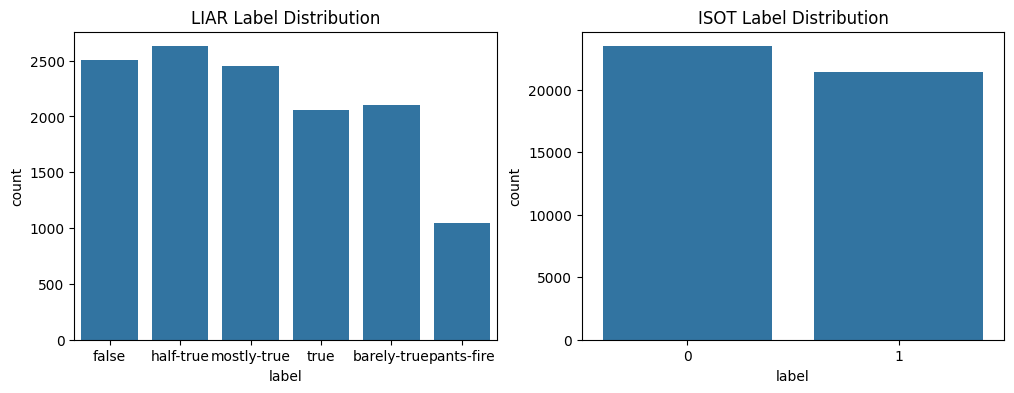

In [141]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
liar = pd.concat([train_data, test_data, val_data], axis=0, ignore_index=True)
isot = pd.concat([train_data2, test_data2, val_data2], axis=0, ignore_index=True)
sns.countplot(x='label', data=liar, ax=axes[0])
axes[0].set_title("LIAR Label Distribution")
sns.countplot(x='label', data=isot, ax=axes[1])
axes[1].set_title("ISOT Label Distribution")
plt.show()

In [142]:
print("LIAR Label Counts:")
print(train_data['label'].value_counts(normalize=True))

LIAR Label Counts:
label
half-true      0.207012
false          0.194395
mostly-true    0.192720
true           0.163131
barely-true    0.161679
pants-fire     0.081063
Name: proportion, dtype: float64


In [143]:
print("ISOT Label Counts:")
print(train_data2['label'].value_counts(normalize=True))

ISOT Label Counts:
label
0    0.522973
1    0.477027
Name: proportion, dtype: float64


In [144]:
combined_train = pd.concat([train_data, train_data2], axis=0, ignore_index=True)
combined_test = pd.concat([test_data, test_data2], axis=0, ignore_index=True)
combined_val = pd.concat([val_data, val_data2], axis=0, ignore_index=True)
print("Combined Train Dataset Shape:", combined_train.shape)
print("Combined Test Dataset Shape:", combined_test.shape)
print("Combined Validation Dataset Shape:", combined_val.shape)

Combined Train Dataset Shape: (40384, 18)
Combined Test Dataset Shape: (8644, 18)
Combined Validation Dataset Shape: (8661, 18)


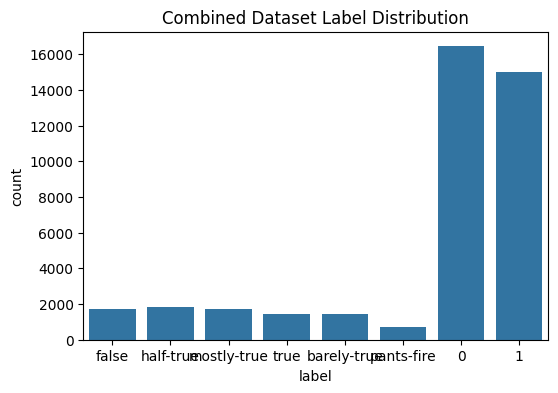

In [145]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=combined_train)
plt.title("Combined Dataset Label Distribution")
plt.show()

In [146]:
print("Combined Label Distribution:")
print(combined_train['label'].value_counts(normalize=True))

Combined Label Distribution:
label
0              0.406993
1              0.371236
half-true      0.045909
false          0.043111
mostly-true    0.042740
true           0.036178
barely-true    0.035856
pants-fire     0.017977
Name: proportion, dtype: float64


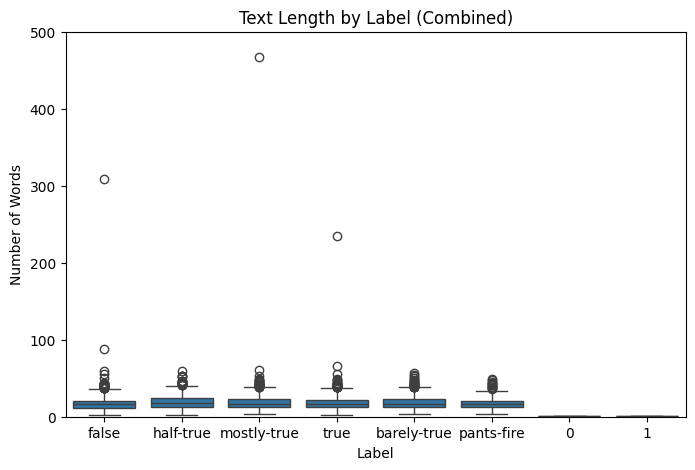

In [147]:
combined_train['text_length'] = combined_train['statement'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.boxplot(data=combined_train, x='label', y='text_length')
plt.title("Text Length by Label (Combined)")
plt.xlabel("Label")
plt.ylabel("Number of Words")
plt.ylim(0, 500)
plt.show()

# Data Cleaning and Missing Value Handling

In [16]:
for df in [train_data, val_data, test_data]:
    df.drop(['id', 'subject(s)', 'state info', 'party', 'speaker', 'speaker_job_title', 'barely_true_count', 'false_count', 'half_true_count', 'mostly_true_count',
             'pants_on_fire_count', 'context'], axis=1, inplace=True)
    df.drop_duplicates(inplace=True)
    df.replace('', np.nan, inplace=True)

In [17]:
print(train_data.columns)

Index(['label', 'statement'], dtype='object')


In [18]:
for df in [train_data2, val_data2, test_data2]:
    df['statement'] = df.apply(lambda row: f"{row['title']}. {row['text']}", axis=1)
    df.drop(['title', 'text', 'date', 'subject'], axis=1, inplace=True)
    df.drop_duplicates(inplace=True)
    df.replace('', np.nan, inplace=True)

In [19]:
print(train_data2.columns)

Index(['label', 'statement'], dtype='object')


# Text Preprocessing

In [20]:
for df in [train_data, val_data, test_data, train_data2, val_data2, test_data2]:
    df['statement'] = df['statement'].str.lower()

In [21]:
import contractions
def expand_contractions(text):
    return contractions.fix(text)

In [22]:
def sentence_tokenize(text):
    sentences = nltk.sent_tokenize(text)
    return " ".join(sentences)

In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = word_tokenize(text.lower())
    return ' '.join([word for word in words if word not in stop_words])

In [24]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [25]:
def remove_repeating_chars(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

In [26]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

In [27]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [28]:
def preprocess_text(text):
    text = sentence_tokenize(text)
    text = expand_contractions(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = remove_repeating_chars(text)
    text = remove_numbers(text)
    text = remove_stopwords(text)
    return text

In [30]:
for df in [train_data, val_data, test_data, train_data2, test_data2, val_data2]:
    df['statement'] = df['statement'].astype(str).apply(preprocess_text)

# Tokenization, Stemming and Lemmatization

In [31]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
ps = PorterStemmer()
lm = WordNetLemmatizer()

In [32]:
def stem_words(tokens):
    return [ps.stem(word) for word in tokens]

In [33]:
def lemmatize_words(tokens):
    return [lm.lemmatize(word) for word in tokens]

In [34]:
for df in [train_data, test_data, val_data, train_data2, test_data2, val_data2]:
    df['statement'] = df['statement'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Word Embedding (Word2Vec)

In [35]:
from gensim.models import Word2Vec
for df in [train_data, test_data, val_data, train_data2, test_data2, val_data2]:
    df['tokens'] = df['statement'].apply(lambda x: word_tokenize(str(x).lower()))

In [36]:
w2v_model = Word2Vec(sentences=train_data['tokens'], vector_size=100, window=5, min_count=1, workers=4)
w2v_model = Word2Vec(sentences=train_data2['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [37]:
def sentence_vector(sentence, model):
    words = [word for word in sentence if word in model.wv]
    if len(words) == 0:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[word] for word in words], axis=0)

In [38]:
for df in [train_data, test_data, val_data, train_data2, test_data2, val_data2]:
    df['vector'] = df['tokens'].apply(lambda x: sentence_vector(x, w2v_model))

In [39]:
print(train_data[['statement', 'vector']].head())
print(train_data2[['statement', 'vector']].head())

                                           statement  \
0  says annies list political group supports thir...   
1  decline coal start started natural gas took st...   
2  hillary clinton agrees john mccain voting give...   
3  health care reform legislation likely mandate ...   
4               economic turnaround started end term   

                                              vector  
0  [-0.87617284, 0.6547552, -1.0773294, -0.409584...  
1  [-0.62658083, -0.105676, -0.80916446, 0.162748...  
2  [-0.3656434, 0.62897855, -1.209611, -1.4132699...  
3  [-1.475407, 1.6081747, -1.1092592, -0.33772495...  
4  [-0.26870084, 0.46820608, -1.5385447, 0.786352...  
                                               statement  \
20785  donald trump time ’ person year — hitler… stal...   
6071   hillary ’ latest challenge progressives one ne...   
31853  donald trump totally melted live television vi...   
36518  michigan government epa ‘ tell us ’ january re...   
23164  syrian kurdish militia att

# Feature Engineering

In [40]:
for df in [train_data, test_data, val_data]:
    df['label'] = pd.Categorical(df['label']).codes

In [41]:
def convert_to_binary(y):
     return np.where(y.isin([3, 5]), 1, 0)

In [42]:
for df in [train_data, test_data, val_data]:
    df['label'] = convert_to_binary(df['label'])

In [43]:
merged_train_data = pd.concat([train_data, train_data2], axis=0, ignore_index=True)
merged_train_data = merged_train_data.sample(frac=1, random_state=42).reset_index(drop=True)
print("Merged train data shape:", merged_train_data.shape)

Merged train data shape: (37539, 4)


In [44]:
print(merged_train_data.columns)

Index(['label', 'statement', 'tokens', 'vector'], dtype='object')


In [45]:
merged_test_data = pd.concat([test_data, test_data2], axis=0, ignore_index=True)
merged_test_data = merged_test_data.sample(frac=1, random_state=42).reset_index(drop=True)
print("Merged test data shape:", merged_test_data.shape)

Merged test data shape: (8515, 4)


In [46]:
merged_val_data = pd.concat([val_data, val_data2], axis=0, ignore_index=True)
merged_val_data = merged_val_data.sample(frac=1, random_state=42).reset_index(drop=True)
print("Merged validation data shape:", merged_val_data.shape)

Merged validation data shape: (8519, 4)


In [47]:
X_train_text = np.array(merged_train_data['vector'].tolist())
X_val_text = np.array(merged_val_data['vector'].tolist())
X_test_text = np.array(merged_test_data['vector'].tolist())

In [48]:
y_train_binary = merged_train_data['label'].values
y_val_binary = merged_val_data['label'].values
y_test_binary = merged_test_data['label'].values

# Model Definition

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D, Reshape, GRU, LSTM, Bidirectional,
                                     MultiHeadAttention, LayerNormalization, Attention)
from tensorflow.keras.regularizers import l2

In [50]:
text_input = Input(shape=(100,), name='text_input')
text_reshaped = Reshape((100, 1))(text_input)

In [51]:
conv_layer = Conv1D(filters=512, kernel_size=5, activation='relu')(text_reshaped)
pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
conv_layer2 = Conv1D(filters=512, kernel_size=3, activation='relu')(pooling_layer)
pooling_layer2 = MaxPooling1D(pool_size=2)(conv_layer2)

In [52]:
attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(pooling_layer2, pooling_layer2)
attention_output = LayerNormalization()(attention_output + pooling_layer2)

In [53]:
bi_lstm_layer = Bidirectional(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(attention_output)
bi_lstm_layer = BatchNormalization()(bi_lstm_layer)

In [54]:
bi_gru_layer = Bidirectional(GRU(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(bi_lstm_layer)
bi_gru_layer = BatchNormalization()(bi_gru_layer)

In [55]:
attention_output1 = Attention()([bi_gru_layer, bi_gru_layer])
attention_output1 = GlobalAveragePooling1D()(attention_output1)

In [56]:
combined = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(attention_output1)
combined = Dropout(0.6)(combined)
combined = BatchNormalization()(combined)

In [57]:
output_layer = Dense(1, activation='sigmoid')(combined)

In [58]:
model = Model(inputs=text_input, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 100, 1)    │          0 │ text_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 96, 512)   │      3,072 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 48, 512)   │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 46, 512)   │    786,944 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 23, 512)   │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 23, 512)   │    525,568 │ max_pooling1d_1[… │
│ (MultiHeadAttentio… │                   │            │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 23, 512)   │          0 │ multi_head_atten… │
│                     │                   │            │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 23, 512)   │      1,024 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 23, 512)   │  1,574,912 │ layer_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 23, 512)   │      2,048 │ bidirectional[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 23, 512)   │  1,182,720 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 23, 512)   │      2,048 │ bidirectional_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 23, 512)   │          0 │ batch_normalizat… │
│ (Attention)         │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ attention[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dropout_1[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 4,210,945 (16.06 MB)

 Trainable params: 4,208,385 (16.05 MB)

 Non-trainable params: 2,560 (10.00 KB)

# Model Training

In [59]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [61]:
history = model.fit(
    X_train_text, y_train_binary,
    validation_data=(X_val_text, y_val_binary),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 959s 2s/step - accuracy: 0.8536 - loss: 0.5568 - val_accuracy: 0.8838 - val_loss: 0.4366 - learning_rate: 0.0010
Epoch 2/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 937s 2s/step - accuracy: 0.8793 - loss: 0.2844 - val_accuracy: 0.6159 - val_loss: 0.6458 - learning_rate: 0.0010
Epoch 3/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 919s 2s/step - accuracy: 0.8780 - loss: 0.2751 - val_accuracy: 0.7952 - val_loss: 0.4656 - learning_rate: 0.0010
Epoch 4/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 921s 2s/step - accuracy: 0.8849 - loss: 0.2673 - val_accuracy: 0.8907 - val_loss: 0.3586 - learning_rate: 0.0010
Epoch 5/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 912s 2s/step - accuracy: 0.8885 - loss: 0.2563 - val_accuracy: 0.8969 - val_loss: 0.2898 - learning_rate: 0.0010
Epoch 6/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 928s 2s/step - accuracy: 0.8893 - loss: 0.2615 - val_accuracy: 0.8541 - val_loss: 0.3335 - learning_rate: 0.0010
Epoch 7/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 925s 2s/step - accuracy: 0.8937 - loss: 0.

# Model Evaluation

In [62]:
test_loss, test_acc = model.evaluate(X_test_text, y_test_binary)
print(f"Final Test Accuracy: {test_acc:.4f}")

267/267 ━━━━━━━━━━━━━━━━━━━━ 57s 213ms/step - accuracy: 0.8988 - loss: 0.2140
Final Test Accuracy: 0.9011


In [63]:
y_pred_probs = model.predict(X_test_text)
y_pred = (y_pred_probs > 0.5).astype(int)

267/267 ━━━━━━━━━━━━━━━━━━━━ 60s 220ms/step


In [148]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred, target_names=["True", "Fake"]))


Classification Report:
              precision    recall  f1-score   support

        True       0.85      0.99      0.92      4628
        Fake       0.99      0.79      0.88      3887

    accuracy                           0.90      8515
   macro avg       0.92      0.89      0.90      8515
weighted avg       0.91      0.90      0.90      8515



# Performance Visualization

In [65]:
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay, roc_curve, auc, average_precision_score
import matplotlib.pyplot as plt

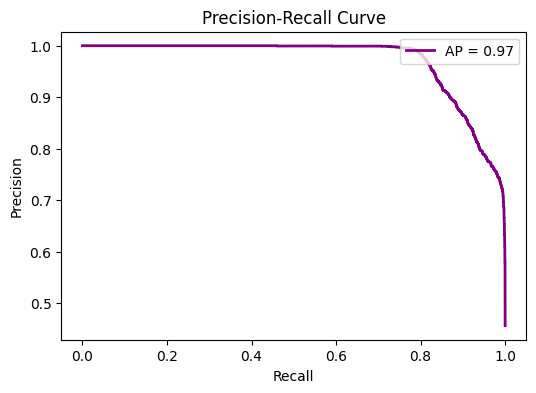

In [66]:
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_probs)
avg_precision = average_precision_score(y_test_binary, y_pred_probs)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, lw=2, color='purple', label=f'AP = {avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

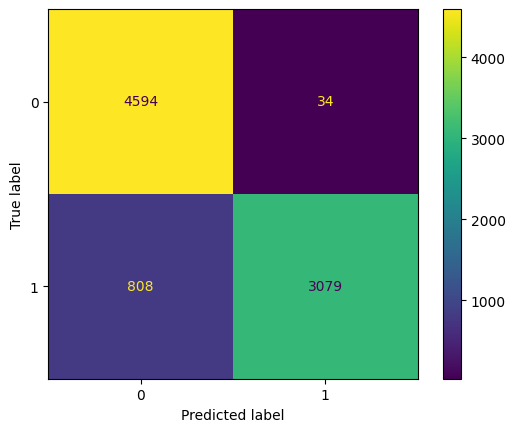

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test_binary, y_pred)
plt.show()

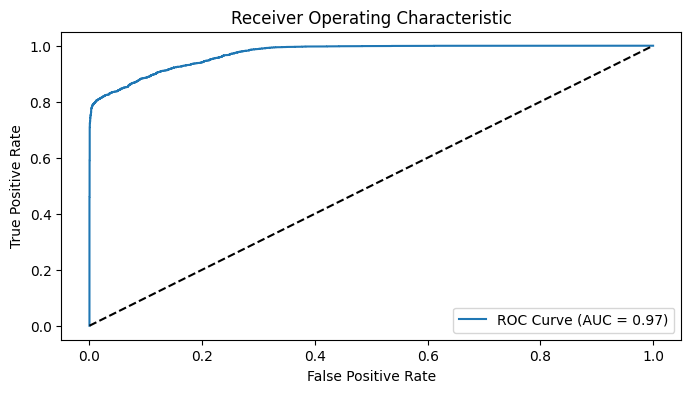

In [68]:
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

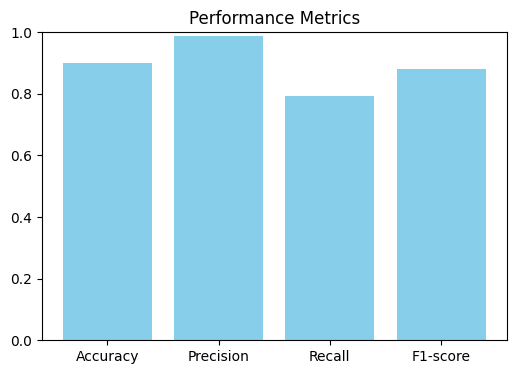

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metrics = {
    "Accuracy": accuracy_score(y_test_binary, y_pred),
    "Precision": precision_score(y_test_binary, y_pred),
    "Recall": recall_score(y_test_binary, y_pred),
    "F1-score": f1_score(y_test_binary, y_pred)
}

plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title("Performance Metrics")
plt.ylim(0, 1)
plt.show()

# Explainable AI (LIME + SHAP)

In [70]:
from lime.lime_text import LimeTextExplainer
def _tokenize_for_model(text: str):
    cleaned = preprocess_text(str(text))
    return word_tokenize(cleaned)

In [71]:
def texts_to_vectors(texts):
    vecs = []
    for t in texts:
        toks = _tokenize_for_model(t)
        vecs.append(sentence_vector(toks, w2v_model))
    return np.vstack(vecs)

In [72]:
def predict_proba_texts(texts):
    X = texts_to_vectors(texts)
    probs = model.predict(X, verbose=0).reshape(-1)
    return np.vstack([1.0 - probs, probs]).T

In [73]:
def predict_pos(texts):
    X = texts_to_vectors(texts)
    return model.predict(X, verbose=0).reshape(-1)

In [74]:
example_text = merged_test_data['statement'].iloc[0]
print("Example text:", example_text[:300], "..." if len(example_text)>300 else "")

Example text: google ceo shreds trump ’ immigration ban bad business families donald trump ban muslims emigrating united states negative effect businesses families employees ceo google called itwhen became clear trump going sign executive order banning muslims entering united states companies across country recal ...


In [75]:
CLASS_NAMES = ["Fake", "True"]
lime_explainer = LimeTextExplainer(class_names=CLASS_NAMES)
lime_exp = lime_explainer.explain_instance(
    example_text,
    predict_proba_texts,
    num_features=12,
    top_labels=1
)

In [77]:
print("\nLIME top features per label:")
for label in lime_exp.available_labels():
    print(f"\nLabel {label}:")
    for w, wgt in lime_exp.as_list(label=label):
        print(f"{w:>20s}  {wgt:+.4f}")


LIME top features per label:

Label 0:
               trump  +0.0789
               image  +0.0275
               order  +0.0234
                back  +0.0226
                went  +0.0218
               worse  +0.0212
              united  -0.0168
                 ban  -0.0101
           companies  -0.0076
           executive  -0.0070
              states  -0.0069
             country  -0.0069


In [78]:
with open("lime_explanation.html","w", encoding="utf-8") as f:
    f.write(lime_exp.as_html())
print("\nSaved: lime_explanation.html (open/download to view interactive LIME)")


Saved: lime_explanation.html (open/download to view interactive LIME)


In [79]:
import shap
shap.initjs()
text_masker = shap.maskers.Text()
shap_explainer = shap.Explainer(predict_pos, text_masker)
shap_values = shap_explainer([example_text])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:20, 20.56s/it]               


In [80]:
try:
    shap.plots.text(shap_values[0])
except Exception:
    shap.plots.bar(shap_values[0], max_display=12)
    plt.show()

In [81]:
background_summary = shap.kmeans(X_train_text, 50)
te_size = min(20, len(X_test_text))
test_sample = X_test_text[:te_size]
kernel_explainer = shap.KernelExplainer(lambda X: model.predict(X).reshape(-1), background_summary)
shap_vals_num = kernel_explainer.shap_values(test_sample, nsamples=100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 206ms/step
1/1 

In [82]:
if isinstance(shap_vals_num, list):
    shap_vals_num = shap_vals_num[0]

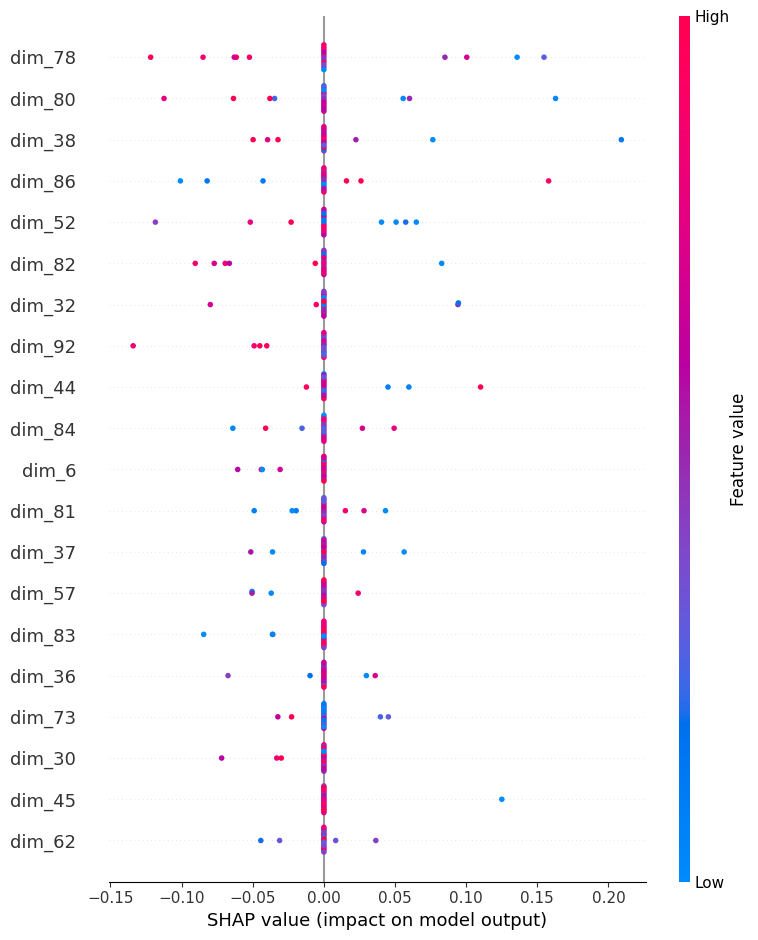

In [85]:
shap.summary_plot(
    shap_vals_num,
    test_sample,
    feature_names=[f"dim_{i}" for i in range(X_train_text.shape[1])]
)
plt.show()